      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9
TV           float64
Radio        float64
Newspaper    float64
Sales        float64
dtype: object
TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64
0
0
TV           float64
Radio        float64
Newspaper    float64
Sales        float64
dtype: object
TV           float64
Radio        float64
Newspaper    float64
Sales        float64
dtype: object
TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64
TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64
TV           float64
Radio        float64
Newspaper    float64
Sales        float64
dtype: object


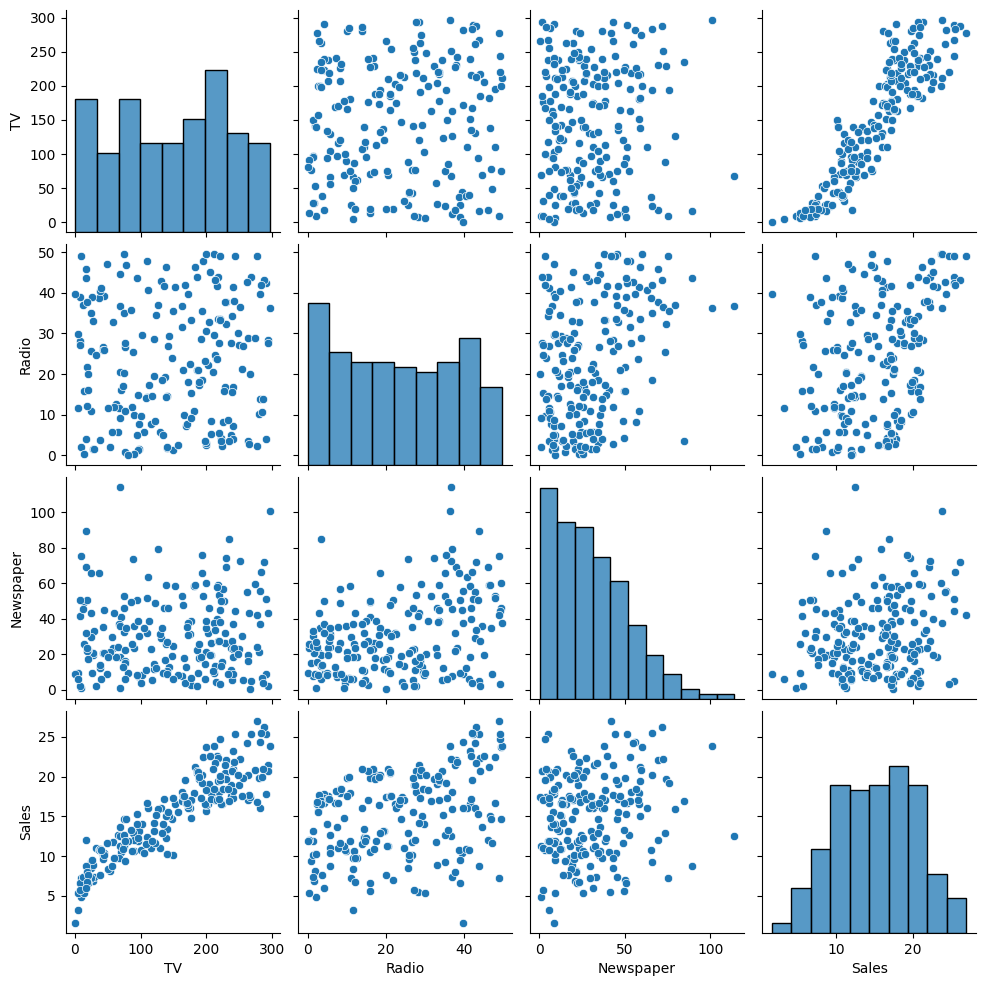

Mean Squared Error: 2.907756910271091


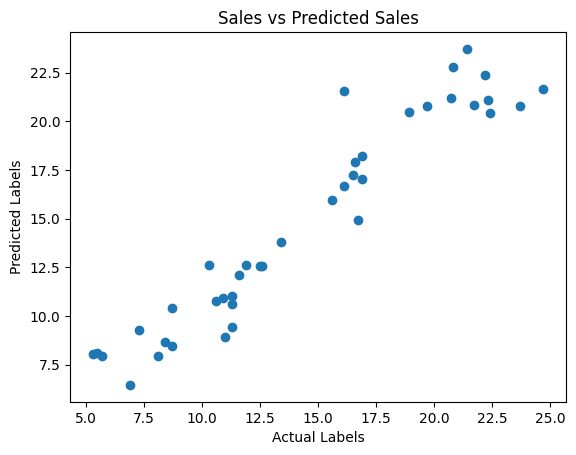

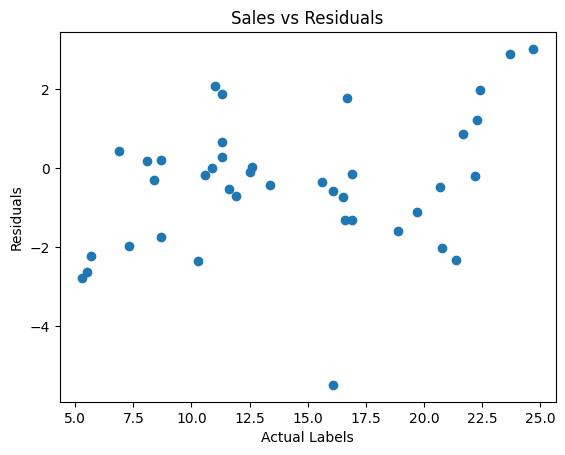

           Coefficient
TV            0.054509
Radio         0.100945
Newspaper     0.004337
4.714126402214129
[20.30295619]
[20.30295619]


c:\Users\sufyaan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\sufyaan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns   
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load the data
data = pd.read_csv('Sales.csv')
print(data.head())

# Check the data types
print(data.dtypes)

# Check for missing values
print(data.isnull().sum())

# Check for duplicates
print(data.duplicated().sum())

# Drop duplicates
data = data.drop_duplicates()

# Check for duplicates
print(data.duplicated().sum())

# Check the data types
print(data.dtypes)

# Convert the data types
data['TV'] = pd.to_numeric(data['TV'], errors='coerce')
data['Radio'] = pd.to_numeric(data['Radio'], errors='coerce')
data['Newspaper'] = pd.to_numeric(data['Newspaper'], errors='coerce')
data['Sales'] = pd.to_numeric(data['Sales'], errors='coerce')

# Check the data types
print(data.dtypes)

# Check for missing values
print(data.isnull().sum())

# Fill missing values
data['TV'] = data['TV'].fillna(data['TV'].mean())
data['Radio'] = data['Radio'].fillna(data['Radio'].mean())
data['Newspaper'] = data['Newspaper'].fillna(data['Newspaper'].mean())
data['Sales'] = data['Sales'].fillna(data['Sales'].mean())

# Check for missing values
print(data.isnull().sum())

# Check the data types
print(data.dtypes)

# Visualize the data
sns.pairplot(data)
plt.show()

# Create the features and target
X = data.drop('Sales', axis=1)
y = data['Sales']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

# Plot the predictions
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Sales vs Predicted Sales')
plt.show()

# Plot the residuals
residuals = y_test - y_pred
plt.scatter(y_test, residuals)
plt.xlabel('Actual Labels')
plt.ylabel('Residuals')
plt.title('Sales vs Residuals')
plt.show()

# Check the coefficients
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)

# Check the intercept
print(model.intercept_)

# Make a prediction
prediction = model.predict([[100, 100, 10]])
print(prediction)

# Save the model
import joblib
joblib.dump(model, 'model.pkl')

# Load the model
model = joblib.load('model.pkl')

# Make a prediction
prediction = model.predict([[100, 100, 10]])
print(prediction)



TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64


C:\Users\sufyaan\AppData\Local\Temp\ipykernel_2864\2189962045.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['TV'].fillna(data['TV'].mean(), inplace=True)


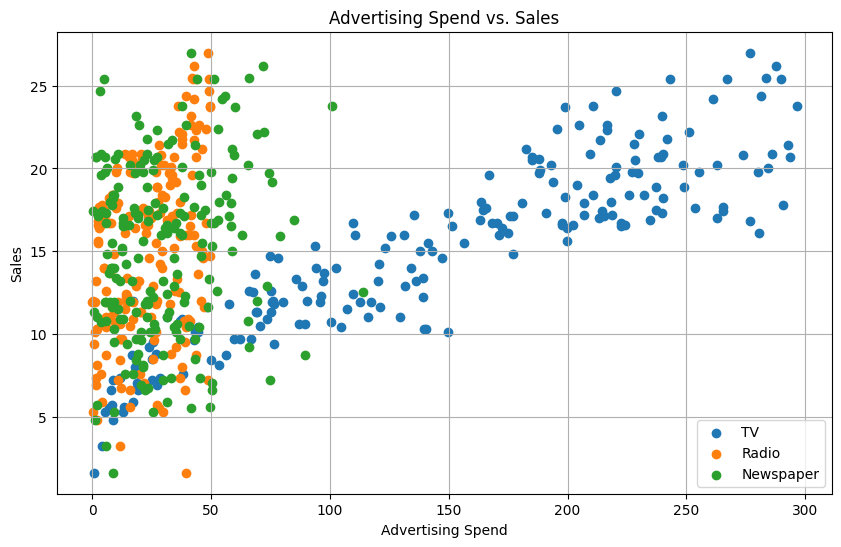

0.9025912899684558
Predicted Sales for TV: $150, Radio: $100, Newspaper: $50 is $23.51


c:\Users\sufyaan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

# Load the data (replace 'your_data.csv' with your actual file path)
data = pd.read_csv('Sales.csv')

# Check for missing values
print(data.isnull().sum())  # Display count of missing values in each column

# Handle missing values (consider imputation or removal based on data quality)
# Example: fill numerical missing values with mean and categorical with mode
data['TV'].fillna(data['TV'].mean(), inplace=True)
for col in data.select_dtypes(include=['object']):
  data[col].fillna(data[col].mode()[0], inplace=True)

# Explore relationships between features and target variable (Sales) with scatter plots
plt.figure(figsize=(10, 6))
plt.scatter(data['TV'], data['Sales'], label='TV')
plt.scatter(data['Radio'], data['Sales'], label='Radio')
plt.scatter(data['Newspaper'], data['Sales'], label='Newspaper')
plt.xlabel('Advertising Spend')
plt.ylabel('Sales')
plt.title('Advertising Spend vs. Sales')
plt.legend()
plt.grid(True)
plt.show()

# Feature scaling (consider scaling if features have different ranges)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[['TV', 'Radio', 'Newspaper']])

# Train a linear regression model to predict Sales based on Advertising spend
model = LinearRegression()
model.fit(data_scaled, data['Sales'])

# Print R-squared value to see how well the model fits the data
print(model.score(data_scaled, data['Sales']))  # R-squared closer to 1 indicates better fit

# Predict Sales for hypothetical new advertising spends
new_TV = 150  # Replace with your desired value
new_Radio = 100  # Replace with your desired value
new_Newspaper = 50  # Replace with your desired value
new_data = np.array([new_TV, new_Radio, new_Newspaper]).reshape(1, -1)
new_data_scaled = scaler.transform(new_data)
predicted_sales = model.predict(new_data_scaled)

print(f"Predicted Sales for TV: ${new_TV}, Radio: ${new_Radio}, Newspaper: ${new_Newspaper} is ${predicted_sales[0]:.2f}")

#  Explore more advanced models (Random Forest, Gradient Boosting) for potentially better performance




** Baseline Model (without Advertising Features) **
Mean Squared Error: 3.87

** Model: Linear Regression **
Mean Squared Error: 2.06

** Model: Random Forest **
Mean Squared Error: 3.00

** Model: Support Vector Regression **
Mean Squared Error: 4.08

** Optimized Random Forest Model **
Best Parameters: {'max_depth': 8, 'n_estimators': 300}
Best Mean Squared Error: 1.79

** Model: Optimized Random Forest **
Mean Squared Error: 3.14

** Feature Importance (Optimized Random Forest) **
             Feature  Importance
3  Total_Advertising    0.812707
0                 TV    0.112014
1              Radio    0.036354
5        Radio_Ratio    0.016072
6    Newspaper_Ratio    0.009426
2          Newspaper    0.006849
4           TV_Ratio    0.006578

Predicted Sales: $16.82


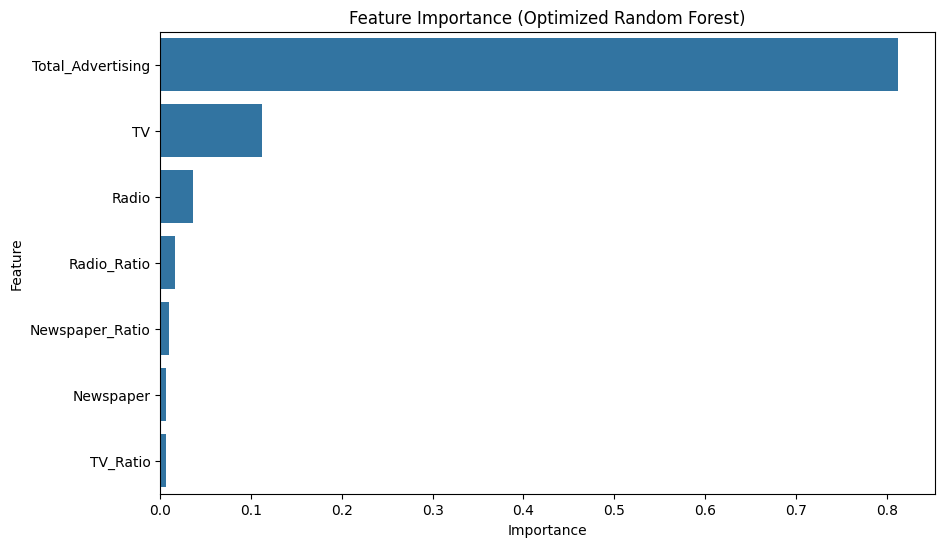

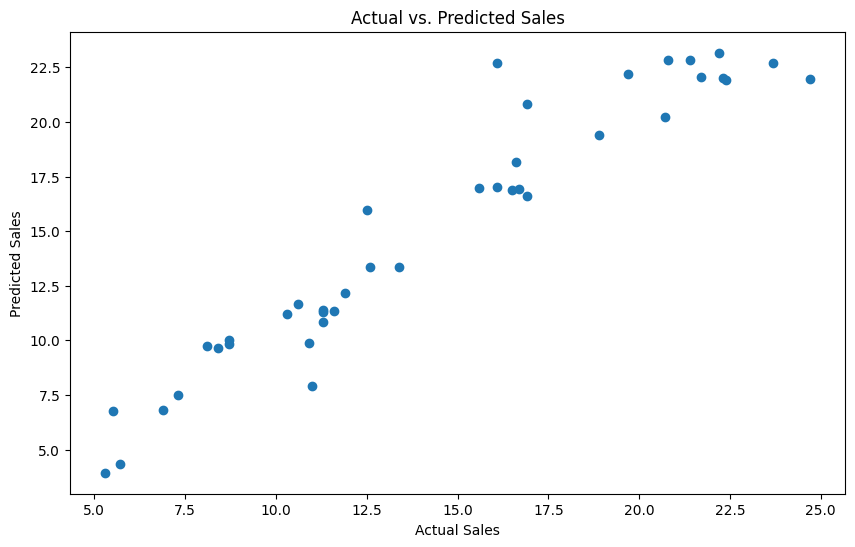

['best_model.pkl']

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

# Load data (replace with your data path)
data = pd.read_csv("Sales.csv")

# Feature engineering (consider creating additional features based on your data)
data["Total_Advertising"] = data["TV"] + data["Radio"] + data["Newspaper"]
data["TV_Ratio"] = data["TV"] / data["Total_Advertising"]
data["Radio_Ratio"] = data["Radio"] / data["Total_Advertising"]
data["Newspaper_Ratio"] = data["Newspaper"] / data["Total_Advertising"]

# Target variable
target = "Sales"

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data.drop(target, axis=1), data[target], test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Support Vector Regression": SVR()
}

# Function to evaluate and print model performance
def evaluate_model(model_name, model, X_test_scaled, y_test):
    y_pred = model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    print(f"\n** Model: {model_name} **")
    print(f"Mean Squared Error: {mse:.2f}")

# Evaluate baseline model (without advertising features)
baseline_model = LinearRegression()
baseline_model.fit(X_train.drop(["TV", "Radio", "Newspaper"], axis=1), y_train)
y_pred_baseline = baseline_model.predict(X_test.drop(["TV", "Radio", "Newspaper"], axis=1))
baseline_mse = mean_squared_error(y_test, y_pred_baseline)
print(f"\n** Baseline Model (without Advertising Features) **")
print(f"Mean Squared Error: {baseline_mse:.2f}")

# Train and evaluate models
for model_name, model in models.items():
    model.fit(X_train_scaled, y_train)
    evaluate_model(model_name, model, X_test_scaled, y_test)

# Model optimization (example using Random Forest)
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [4, 6, 8]
}

grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)

# Print best parameters and score
best_random_forest = grid_search.best_estimator_
print("\n** Optimized Random Forest Model **")
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Mean Squared Error: {-grid_search.best_score_:.2f}")

# Evaluate the best model
evaluate_model("Optimized Random Forest", best_random_forest, X_test_scaled, y_test)

# Feature importance analysis (for Random Forest)
if isinstance(best_random_forest, RandomForestRegressor):
    feature_importance = best_random_forest.feature_importances_
    feature_importance_df = pd.DataFrame({"Feature": X_train.columns, "Importance": feature_importance})
    feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)
    print("\n** Feature Importance (Optimized Random Forest) **")
    print(feature_importance_df)

# prediction
new_data = pd.DataFrame({"TV": [100], "Radio": [100], "Newspaper": [10], "Total_Advertising": [210], "TV_Ratio": [0.476], "Radio_Ratio": [0.476], "Newspaper_Ratio": [0.048]})
new_data_scaled = scaler.transform(new_data)
predicted_sales = best_random_forest.predict(new_data_scaled)
print(f"\nPredicted Sales: ${predicted_sales[0]:.2f}")

#visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=feature_importance_df)
plt.title("Feature Importance (Optimized Random Forest)")
plt.show()

# Plot actual vs. predicted sales
plt.figure(figsize=(10, 6))
plt.scatter(y_test, best_random_forest.predict(X_test_scaled))
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs. Predicted Sales")
plt.show()





# Save the best model (optional)
import joblib
joblib.dump(best_random_forest, "best_model.pkl")












